In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
import seaborn as sns
import numpy as np
import math
import jieba
import requests
import json
import gmplot

In [80]:
path='大众点评_北京火锅.csv'
df=pd.read_csv(path,engine='python')
import sys
sys.path.append('D:\情绪-建成环境\编程\sentiment')
import coord_converter,coordTransform_utils

In [19]:
#bd坐标转换为84坐标
def transform(df):
    '''转换经纬度坐标'''
    return coordTransform_utils.bd09_to_wgs84(df['经度'],df['纬度'])
df['经纬度']=df.apply(transform,axis=1)
df['经度']=df['经纬度'].apply(lambda x:x[0])
df['纬度']=df['经纬度'].apply(lambda x:x[1])
df.drop(['经纬度'],axis=1,inplace=True)
df.to_excel('大众点评_北京火锅.xlsx')

In [87]:
excel_path='大众点评_北京火锅.xlsx'
df=pd.read_excel(excel_path)
df.describe()   #大致的分布

,Unnamed: 0,评论数,人均,口味,环境,服务,经度,纬度
count,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000
mean,455.500000,1492.437500,115.418860,8.813377,8.706250,8.660307,116.403263,39.931924
std,263.416021,1895.055003,53.831403,0.337903,0.435391,0.444583,0.096411,0.073419
min,0.000000,3.000000,33.000000,7.300000,7.000000,6.900000,116.104313,39.683551
25%,227.750000,383.000000,87.000000,8.600000,8.400000,8.400000,116.339016,39.895317
50%,455.500000,836.000000,103.000000,8.900000,8.800000,8.800000,116.409199,39.927317
75%,683.250000,1837.000000,127.000000,9.100000,9.100000,9.000000,116.456208,39.967908
max,911.000000,16720.000000,567.000000,9.400000,9.400000,9.500000,117.116917,40.386657


In [88]:
#转换为shp格式文件
def str_to_point(df):
    '''经纬度坐标转换为point'''
    return Point(df['经度'],df['纬度'])

df['geometry']=df.apply(str_to_point,axis=1)
gpd.GeoDataFrame(df).to_file('火锅_地理数据\\point_beijing_hotpot.shp',encoding='utf-8')

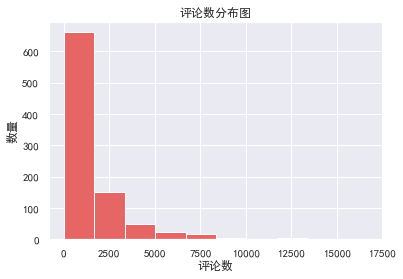

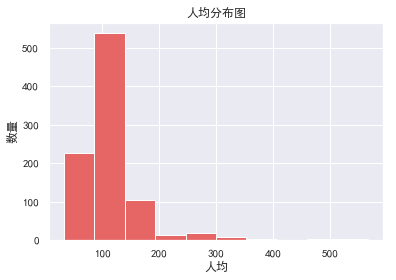

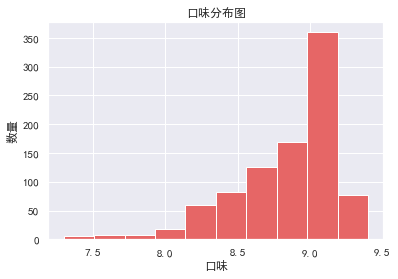

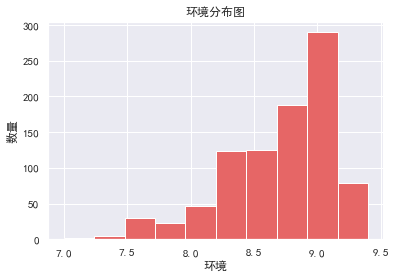

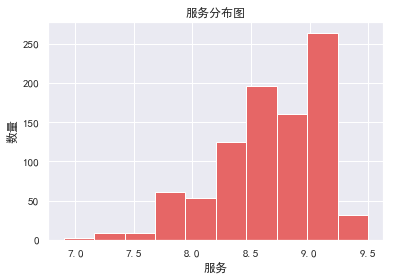

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


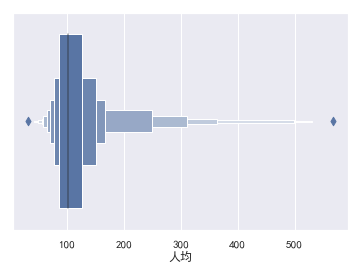

In [46]:
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['SimHei']

indexs=['评论数','人均','口味','环境','服务']
for index in indexs:
    plt.hist(df[index],color=(0.9,0.4,0.4))
    # plt.legend()
    plt.title('{}分布图'.format(index))
    plt.xlabel(index)
    plt.ylabel('数量')
    plt.show()
    

sns.boxenplot(df['人均'])
plt.show()

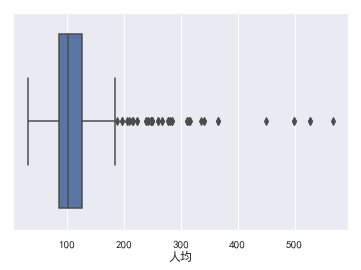

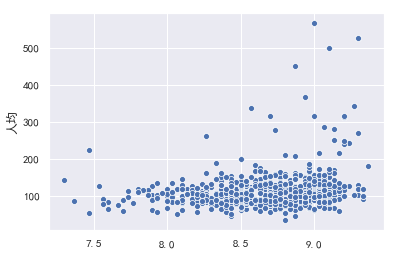

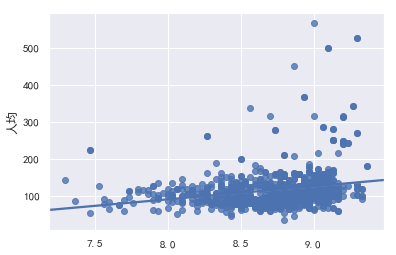

In [105]:
sns.boxplot(df['人均'])
plt.show()

sns.scatterplot([(x+y+z)/3for x,y,z in zip(df['口味'],df['环境'],df['服务'])],df['人均'])
plt.show()

sns.regplot([(x+y+z)/3for x,y,z in zip(df['口味'],df['环境'],df['服务'])],df['人均'])
plt.show()

In [35]:
#整体的人均消费和评分之间的相关性
pd.DataFrame({'评分':[(x+y+z)/3 for x,y,z in zip(df['口味'],df['环境'],df['服务'])],'人均消费':df['人均']}).corr()

,评分,人均消费
评分,1.000000,0.233799
人均消费,0.233799,1.000000


       Unnamed: 0           评论数          人均          口味          环境  \
count  912.000000    912.000000  912.000000  912.000000  912.000000   
mean   455.500000   1492.437500  115.418860    8.813377    8.706250   
std    263.416021   1895.055003   53.831403    0.337903    0.435391   
min      0.000000      3.000000   33.000000    7.300000    7.000000   
25%    227.750000    383.000000   87.000000    8.600000    8.400000   
50%    455.500000    836.000000  103.000000    8.900000    8.800000   
75%    683.250000   1837.000000  127.000000    9.100000    9.100000   
max    911.000000  16720.000000  567.000000    9.400000    9.400000   

               服务          经度          纬度        综合评分         性价比  
count  912.000000  912.000000  912.000000  912.000000  912.000000  
mean     8.660307  116.403263   39.931924    8.726645    0.084929  
std      0.444583    0.096411    0.073419    0.356660    0.025368  
min      6.900000  116.104313   39.683551    7.300000    0.015873  
25%      8.400000  1

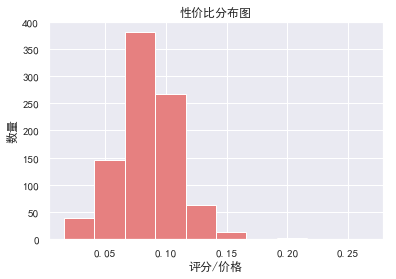

In [107]:
#看看哪些店比较高性价比
df['综合评分']=pd.Series([(x+y+z)/3 for x,y,z in zip(df['口味'],df['环境'],df['服务'])])
df['性价比']=pd.Series([x/y for x,y in zip(df['综合评分'],df['人均'])])
print(df.describe())

plt.hist(df['性价比'],color=(0.9,0.5,0.5))
plt.xlabel('评分/价格')
plt.ylabel('数量')
plt.title('性价比分布图')
plt.show()

In [99]:
#看看哪些特色菜比较普遍
# df['特色菜']=df['特色菜'].apply(lambda x:x.split())
menus=[]
for x in df['特色菜']:
    menus+=x
for x in set(menus):
    if menus.count(x)>=8:
        print(x,menus.count(x))

现炸酥肉 9
串串 17
毛肚 9
寿喜烧 8
竹荪 8
小酥肉 9
鲜鸭血 18
黄门嫩牛肉 8
冷锅串串 13
牛肉 11
手打鲜牛肉丸 8
红糖糍粑 19
吊龙 39
串串香 11
鸳鸯锅 12
牛上脑 10
手切鲜羊肉 29
麻酱 12
寿喜锅 12
麻辣牛肉 57
鸳鸯锅底 25
麻酱小料 8
羊肉串 9
香菜牛肉 14
冒脑花 8
手打牛肉丸 9
鲜毛肚 14
嫩牛肉 11
牛蛙 9
巴蜀嫩牛肉 9


In [100]:
names=list(df['店名'].apply(lambda x:x.split('(')[0]))
  
for x in set(names):
    if names.count(x)>=5:
        print(x,names.count(x))

芦月轩羊蝎子 9
三味缘牛蛙火锅 8
成都葫芦娃一家人火锅 6
小牛海记潮汕牛肉店 5
黄门老灶火锅 9
鲜牛记潮汕牛肉火锅 5
东来顺饭庄 12
马路边边串串香 5
斗川火锅 9
汕头八合里海记牛肉店 6
来涮蜀串串香火锅 5
北门涮肉 7
唇辣号重庆老火锅 7
有范儿串串香火锅 11
伊豆野菜村 10
井格重庆火锅 5
新辣道鱼火锅 7
小龙坎老火锅 8
老门框爆肚涮肉 5
旬野菜新派日式火锅 8
蝎王府羊蝎子 13
宽板凳老灶火锅 6
鸦儿李记 5
蜀签传成都串串 5
山城辣妹子重庆火锅 5
常赢三兄弟涮肉 5
重庆地瓜老火锅 5
湊湊火锅·茶憩 5


In [86]:
#百度地图匹配经纬度
def getlnglat(add):
    ''''''
    url = 'http://api.map.baidu.com/geocoder/v2/'
    output = 'json'
    ak = 'mKwwAcqhu8AdXNq6udI8CP8ENTsMjobG'
    uri = url + '?' + 'address=' + add  + '&output=' + output + '&ak=' + ak
    res = requests.get(uri).content #将其他编码的字符串解码成unicode
    temp = json.loads(res)  #对json数据进行解析
    try:
        return coordTransform_utils.bd09_to_wgs84(temp['result']['location']['lng'],temp['result']['location']['lat'])
    except:
        return 
locations=df['地址'].apply(lambda x:getlnglat('北京市'+str(x)))

In [101]:
# Scatter points    点位地图可视化
gmap = gmplot.GoogleMapPlotter(df['纬度'][0], df['经度'][0], 13)
gmap.scatter(df['纬度'], df['经度'], '#3B0B39', size=20, marker=False)

# Marker
# hidden_gem_lat, hidden_gem_lon = 37.770776, -122.461689
# gmap.marker(hidden_gem_lat, hidden_gem_lon, 'cornflowerblue')

# Draw
gmap.draw("my_map.html")